In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [36]:
data = pd.read_csv('/content/TrafficTwoMonth.csv')

In [37]:
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [39]:
data.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [40]:
data.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


# Exploratory Data Analysis 📈

<Axes: xlabel='Day of the week', ylabel='Count'>

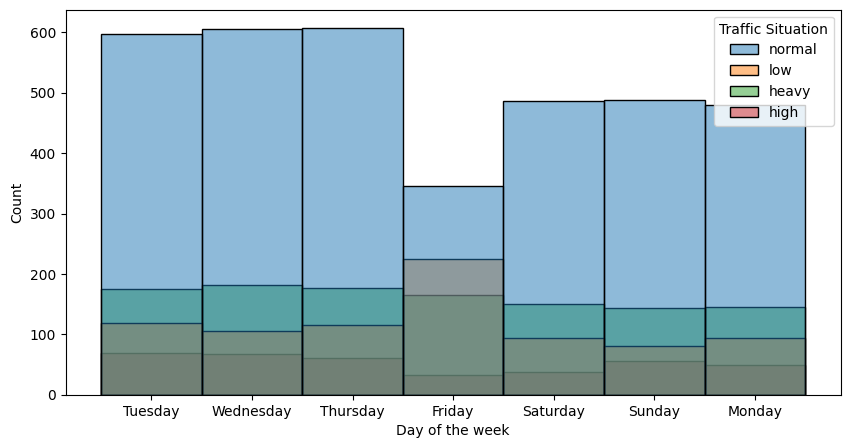

In [41]:
#['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       #'TruckCount', 'Total', 'Traffic Situation']
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="Day of the week", hue="Traffic Situation")

<Axes: xlabel='Date', ylabel='Count'>

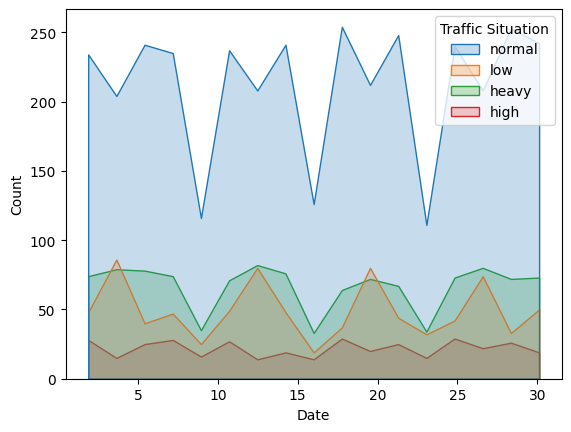

In [42]:
sns.histplot(data, x="Date", hue="Traffic Situation", element="poly")

<Axes: xlabel='Total', ylabel='Count'>

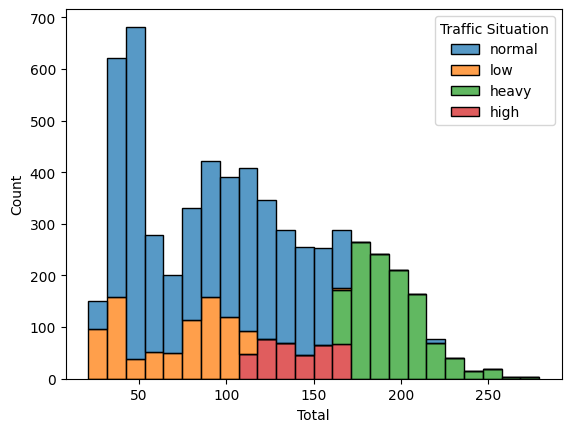

In [43]:
sns.histplot(data=data, x="Total", hue="Traffic Situation", multiple="stack")

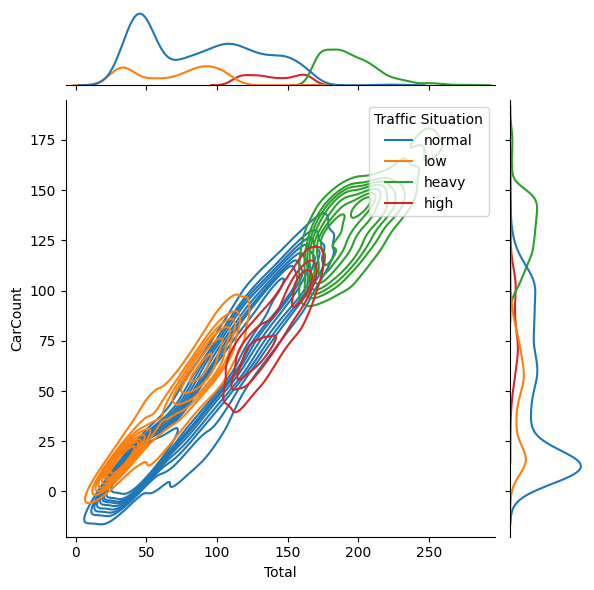

In [44]:
sns.jointplot(data=data, x="Total", y="CarCount", hue="Traffic Situation", kind="kde")

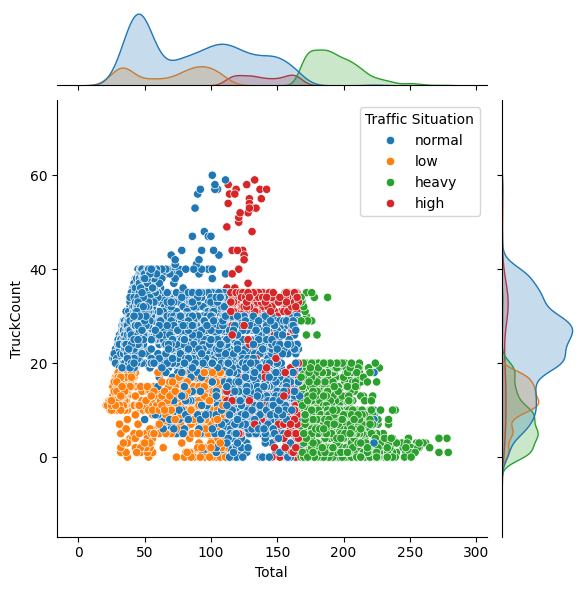

In [45]:
sns.jointplot(data=data, x="Total", y="TruckCount",
              hue="Traffic Situation")

# Feature Engineering 🛠⚙️

In [46]:
data.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [47]:
# Distinct Classes in Target variable
data['Traffic Situation'].value_counts()

,count
Traffic Situation,
normal,3610
heavy,1137
low,834
high,371


We have 04 distinct Classes

In [48]:
#Converting target variable 'Traffic Situation' into Numeric form
data['Traffic Situation'] = data['Traffic Situation'].replace({'low':0, 'normal':1,
                                                              'heavy':2, 'high':3})

<ipython-input-48-e3ba9a60f53e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Traffic Situation'] = data['Traffic Situation'].replace({'low':0, 'normal':1,


In [49]:
#Dealing with 'Day of the week' feature
data['Day of the week'].value_counts()

,count
Day of the week,
Tuesday,960
Wednesday,960
Thursday,960
Friday,768
Saturday,768
Sunday,768
Monday,768


In [50]:
#Converting Days of weak into Numeric form
data['Day of the week'] = data['Day of the week'].replace({'Monday':1,'Tuesday':2,
                                                          'Wednesday':3,'Thursday':4,
                                                          'Friday':5,'Saturday':6,
                                                          'Sunday':7})

<ipython-input-50-21a930fc2358>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Day of the week'] = data['Day of the week'].replace({'Monday':1,'Tuesday':2,


In [51]:
test_temp = data.copy()

In [52]:
#Extracting Specific time-related information from 'Time(24:00 am/pm)' column

data['hour'] = pd.to_datetime(data['Time']).dt.hour #Hour in separate column
data['minute'] = pd.to_datetime(data['Time']).dt.minute #Minute in separate column


# replace 0 with AM
# replace 1 with PM

data['Temp'] = data['Time'].apply(lambda x: x.split(' ')[1]) #Temporary column for AM/PM
data['AM/PM'] = data['Temp'].replace({'AM':0,'PM':1})

<ipython-input-52-db31c400f9e7>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['hour'] = pd.to_datetime(data['Time']).dt.hour #Hour in separate column
<ipython-input-52-db31c400f9e7>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['minute'] = pd.to_datetime(data['Time']).dt.minute #Minute in separate column
<ipython-input-52-db31c400f9e7>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['AM/PM'] = data['Temp'].replace({'AM':0,'PM':1})


In [53]:
#Now remove 'Temp' and 'Time' columns
data= data.drop(columns = ['Time','Temp'], axis=1)
data

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,AM/PM
0,10,2,13,2,2,24,41,1,0,0,0
1,10,2,14,1,1,36,52,1,0,15,0
2,10,2,10,2,2,32,46,1,0,30,0
3,10,2,10,2,2,36,50,1,0,45,0
4,10,2,11,2,1,34,48,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5947,9,4,16,3,1,36,56,1,22,45,1
5948,9,4,11,0,1,30,42,1,23,0,1
5949,9,4,15,4,1,25,45,1,23,15,1
5950,9,4,16,5,0,27,48,1,23,30,1


# Correlations using HeatMap 🗺

In [54]:
data[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'hour', 'minute', 'AM/PM', 'Traffic Situation']].corr()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,hour,minute,AM/PM,Traffic Situation
Date,1.000000e+00,-1.579937e-02,-0.010331,0.000606,-0.003638,0.020669,-0.004893,9.879799e-17,1.235173e-16,1.155847e-16,0.002888
Day of the week,-1.579937e-02,1.000000e+00,0.000756,0.042691,-0.040217,-0.003194,-0.000201,-3.449991e-17,-1.641041e-17,-1.017140e-16,-0.018438
CarCount,-1.033127e-02,7.563311e-04,1.000000,0.708243,0.658417,-0.615043,0.971507,1.538399e-01,-4.548948e-03,1.085476e-01,0.519542
BikeCount,6.056798e-04,4.269059e-02,0.708243,1.000000,0.577671,-0.607720,0.781879,1.179204e-01,1.009466e-03,1.036435e-01,0.400520
BusCount,-3.637580e-03,-4.021672e-02,0.658417,0.577671,1.000000,-0.558372,0.758970,1.816036e-01,-1.806164e-02,1.585635e-01,0.579169
TruckCount,2.066869e-02,-3.193844e-03,-0.615043,-0.607720,-0.558372,1.000000,-0.545390,-2.657474e-02,9.183040e-03,1.577175e-03,-0.052573
Total,-4.893004e-03,-2.010411e-04,0.971507,0.781879,0.758970,-0.545390,1.000000,1.825624e-01,-5.658909e-03,1.437998e-01,0.616679
hour,9.879799e-17,-3.449991e-17,0.153840,0.117920,0.181604,-0.026575,0.182562,1.000000e+00,6.170054e-18,8.667781e-01,0.126384
minute,1.235173e-16,-1.641041e-17,-0.004549,0.001009,-0.018062,0.009183,-0.005659,6.170054e-18,1.000000e+00,8.328502e-18,-0.000304
AM/PM,1.155847e-16,-1.017140e-16,0.108548,0.103644,0.158564,0.001577,0.143800,8.667781e-01,8.328502e-18,1.000000e+00,0.113082


<Axes: >

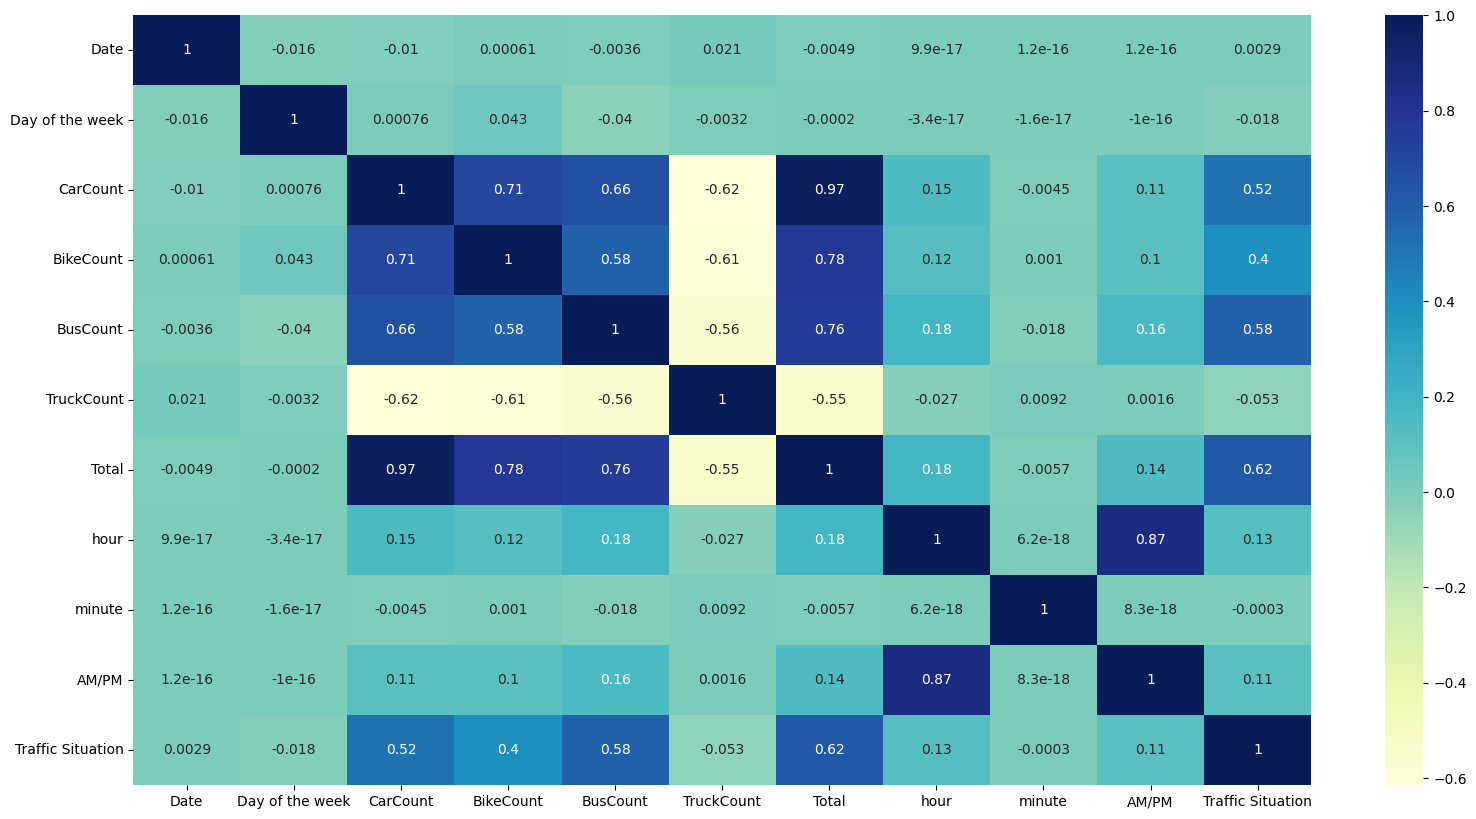

In [55]:
plt.figure(figsize = (19,10))
sns.heatmap(data[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
           'TruckCount', 'Total', 'hour', 'minute', 'AM/PM', 'Traffic Situation']].corr(),
            cmap="YlGnBu",annot=True)

# Splitting Data

In [56]:
data.columns

Index(['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'hour', 'minute', 'AM/PM'],
      dtype='object')

In [57]:
X= data[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total','hour', 'minute', 'AM/PM']]

y= data['Traffic Situation'].values

In [58]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2 , random_state = 0)

# Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

# Model Selection using Voting Classifier 💻

In [60]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [61]:
cl1 = LogisticRegression()
cl2 = RandomForestClassifier()
cl3 = SVC(probability=True)
cl4 = XGBClassifier()
cl5 = AdaBoostClassifier()

voting_cl = VotingClassifier(estimators = [('lr',cl1),('rf',cl2),('svc',cl3),
                                          ('xgb',cl4),('ada',cl5)], voting = 'hard')

voting_cl.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('ada', AdaBoostClassifier())])

In [62]:
voting_pred = voting_cl.predict(test_X)

accuracy = accuracy_score(test_y, voting_pred)

In [63]:
accuracy

0.984047019311503

In [64]:
#Voting classfier using Cross_validation
for clf, label in zip([cl1,cl2,cl3,cl4,cl5],['lr','rf','svc','xgb','ada']):
    scores = cross_val_score(clf, train_X, train_y, scoring='accuracy', cv=5)
    print('Accuracy: ', (scores.mean(), label))

Accuracy:  (0.8832162035853166, 'lr')
Accuracy:  (0.9964287918735174, 'rf')
Accuracy:  (0.9308955796379413, 'svc')
Accuracy:  (0.9993697478991596, 'xgb')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy:  (0.806752669588297, 'ada')


* **RandomForest** accuracy: **99.4%**
* **XgBoost** accuracy: **99.8%**

In [65]:
#Solo RandomForest Accuracy
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)

rfc_pred = rfc.predict(test_X)
accuracy = accuracy_score(test_y, rfc_pred)
accuracy

0.9974811083123426

In [66]:
#Solo Xgboost Accuracy
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(train_X, train_y)

xgbc_pred = xgbc.predict(test_X)
accuracy = accuracy_score(test_y, xgbc_pred)
accuracy

0.9991603694374476

* XGBoost Model isgiving 100% accuracy.
* It can be a sign of potential overfitting.
* Checking the model with cross_validation

# Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_y, xgbc_pred)
conf_matrix

array([[162,   0,   0,   0],
       [  0, 739,   0,   1],
       [  0,   0, 219,   0],
       [  0,   0,   0,  70]])

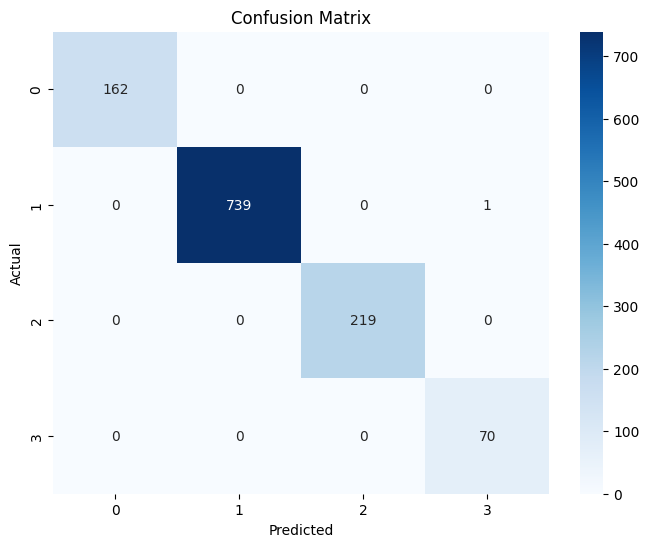

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()